In [1]:
#Importing Libraries
#for manipulations
from __future__ import print_function
import numpy as np
import pandas as pd

#for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

#for intractivity
from ipywidgets import interact

In [2]:
#read the dataset
PATH = 'http://localhost:8888/edit/Agriculture%20Prediction/Agri.csv'
MODELS = './recommender-models/'
data = pd.read_csv('Agri.csv')

In [3]:
#check the shape of the dataset
print("Shape of the dataset: ", data.shape)


Shape of the dataset:  (2200, 8)


In [4]:
#Check the head of the dataset
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
#Check the tail of the dataset
data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,36,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [6]:
#check the all columns or attributes of the dataset
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [7]:
#Check if there is any missing value present in the dataset
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
#check the Crops present in this dataset
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [9]:
#check which types of datatypes using in this dataset
data.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [10]:
# Understand which crops can only be grown in summer season, Winter season, Rainy season
print("Summer Crops")
print(data[(data['temperature'] > 30) & (data['humidity'] > 50)]['label'].unique())
print("-----------------------------------")
print("Winter Crops")
print(data[(data['temperature'] < 20) & (data['humidity'] > 30)]['label'].unique())
print("-----------------------------------")
print("Rainy Crops")
print(data[(data['rainfall'] > 200) & (data['humidity'] > 30)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
-----------------------------------
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
-----------------------------------
Rainy Crops
['rice' 'papaya' 'coconut']


In [11]:
#Check the summary for all the crops
print("Average Ratio of Nitrogen in the soil: {0:.2f}".format(data['N'].mean()))
print("Average Ratio of Phosphorous in the soil: {0:.2f}".format(data['P'].mean()))
print("Average Ratio of Potassium in the soil: {0:.2f}".format(data['K'].mean()))
print("Average Temperature in celsius: {0:.2f}".format(data['temperature'].mean()))
print("Average Relative Humidity in %: {0:.2f}".format(data['humidity'].mean()))
print("Average PH Value of the soil: {0:.2f}".format(data['ph'].mean()))
print("Average Rainfall in mm: {0:.2f}".format(data['rainfall'].mean()))

Average Ratio of Nitrogen in the soil: 50.65
Average Ratio of Phosphorous in the soil: 53.40
Average Ratio of Potassium in the soil: 48.18
Average Temperature in celsius: 25.62
Average Relative Humidity in %: 71.48
Average PH Value of the soil: 6.47
Average Rainfall in mm: 103.46


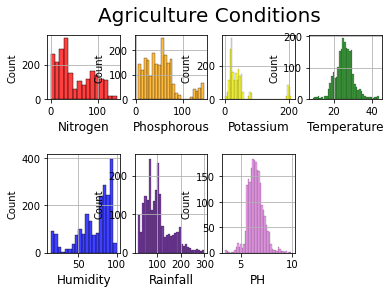

In [12]:
#check the distribution of Agricultural conditions

plt.subplot(3,4,1)
sns.histplot(data['N'], color="red")
plt.xlabel('Nitrogen', fontsize = 12)
plt.grid()

plt.subplot(3,4,2)
sns.histplot(data['P'], color="orange")
plt.xlabel('Phosphorous', fontsize = 12)
plt.grid()

plt.subplot(3,4,3)
sns.histplot(data['K'], color="yellow")
plt.xlabel('Potassium', fontsize = 12)
plt.grid()

plt.subplot(3,4,4)
sns.histplot(data['temperature'], color="green")
plt.xlabel('Temperature', fontsize = 12)
plt.grid()

plt.subplot(2,4,5)
sns.histplot(data['humidity'], color="blue")
plt.xlabel('Humidity', fontsize = 12)
plt.grid()

plt.subplot(2,4,6)
sns.histplot(data['rainfall'], color="indigo")
plt.xlabel('Rainfall', fontsize = 12)
plt.grid()

plt.subplot(2,4,7)
sns.histplot(data['ph'], color="violet")
plt.xlabel('PH', fontsize = 12)
plt.grid()

plt.suptitle('Agriculture Conditions', fontsize = 20)
plt.show()

In [12]:
#Check the summary Statistics for each of the crops

@interact
def summary(crops = list(data['label'].value_counts().index)):
    x = data[data['label'] == crops]
    print("-----Statistics for Nitrogen------")
    print("Minimum Nitrogen required: ", x['N'].min())
    print("Average Nitrogen required: ", x['N'].mean())
    print("Maxmum Nitrogen required: ", x['N'].max())
    
    print("-----Statistics for Phosphorous-----")
    print("Minimum Phosphorous required: ", x['P'].min())
    print("Average Phosphorous required: ", x['P'].mean())
    print("Maxmum Phosphorous required: ", x['P'].max())
    
    print("-----Statistics for Potassium------")
    print("Minimum Potassium required: ", x['K'].min())
    print("Average Potassium required: ", x['K'].mean())
    print("Maxmum Potassium required: ", x['K'].max())
    
    print("-----Statistics for Temperature------")
    print("Minimum Temperature required: {0:.2f}".format(x['temperature'].min()))
    print("Average Temperature required: {0:.2f}".format(x['temperature'].mean()))
    print("Maxmum Temperature required: {0:.2f}".format(x['temperature'].max()))
    
    print("------Statistics for Humidity------")
    print("Minimum Humidity required: {0:.2f}".format(x['humidity'].min()))
    print("Average Humidity required: {0:.2f}".format(x['humidity'].mean()))
    print("Maxmum Humidity required: {0:.2f}".format(x['humidity'].max()))
    
    print("------Statistics for PH------")
    print("Minimum PH required: {0:.2f}".format(x['ph'].min()))
    print("Average PH required: {0:.2f}".format(x['ph'].mean()))
    print("Maxmum PH required: {0:.2f}".format(x['ph'].max()))
    
    print("------Statistics for Rainfall------")
    print("Minimum Rainfall required: {0:.2f}".format(x['rainfall'].min()))
    print("Average Rainfall required: {0:.2f}".format(x['rainfall'].mean()))
    print("Maxmum Rainfall required: {0:.2f}".format(x['rainfall'].max()))

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

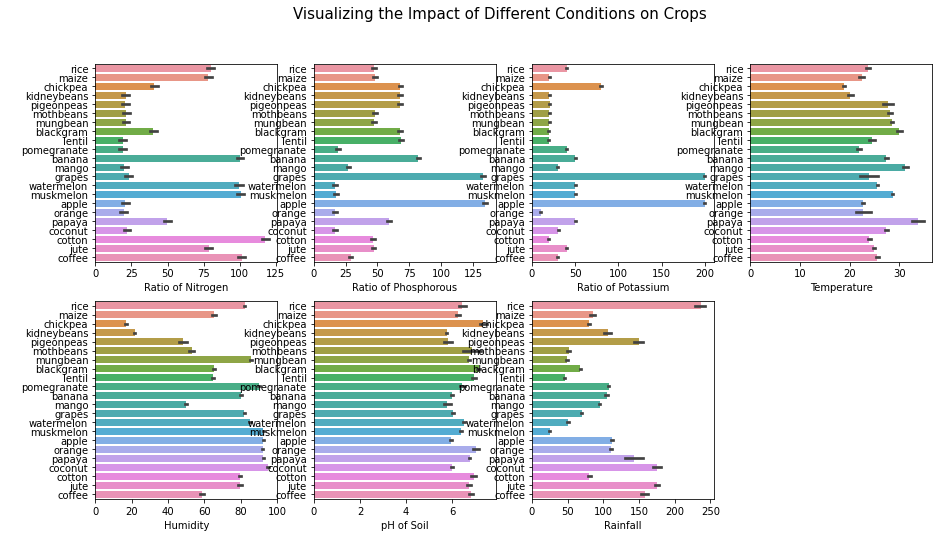

In [14]:
#Data Visualizations
plt.rcParams['figure.figsize'] = (15, 8)

plt.subplot(2, 4, 1)
sns.barplot(data['N'], data['label'])
plt.ylabel(' ')
plt.xlabel('Ratio of Nitrogen', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 2)
sns.barplot(data['P'], data['label'])
plt.ylabel(' ')
plt.xlabel('Ratio of Phosphorous', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 3)
sns.barplot(data['K'], data['label'])
plt.ylabel(' ')
plt.xlabel('Ratio of Potassium', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 4)
sns.barplot(data['temperature'], data['label'])
plt.ylabel(' ')
plt.xlabel('Temperature', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 5)
sns.barplot(data['humidity'], data['label'])
plt.ylabel(' ')
plt.xlabel('Humidity', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 6)
sns.barplot(data['ph'], data['label'])
plt.ylabel(' ')
plt.xlabel('pH of Soil', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 7)
sns.barplot(data['rainfall'], data['label'])
plt.ylabel(' ')
plt.xlabel('Rainfall', fontsize = 10)
plt.yticks(fontsize = 10)

plt.suptitle('Visualizing the Impact of Different Conditions on Crops', fontsize = 15)
plt.show()

In [13]:
#Data correlation matrix of crops
data.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231317,-0.140249,0.024722,0.187856,0.097808,0.057225
P,-0.231317,1.000000,0.736137,-0.127652,-0.119334,-0.137551,-0.063720
K,-0.140249,0.736137,1.000000,-0.160790,0.191038,-0.169953,-0.052945
temperature,0.024722,-0.127652,-0.160790,1.000000,0.205320,-0.017795,-0.030084
humidity,0.187856,-0.119334,0.191038,0.205320,1.000000,-0.008483,0.094423
ph,0.097808,-0.137551,-0.169953,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.057225,-0.063720,-0.052945,-0.030084,0.094423,-0.109069,1.000000


<AxesSubplot:>

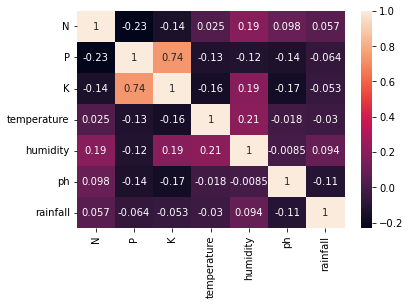

In [14]:
# Data correlation Visualizations
sns.heatmap(data.corr(),annot=True)

In [20]:
#Seperating features and target label
features = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
target = data['label']
labels = data['label']

In [21]:
# Splitting into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size= 0.2,random_state = 2)

In [22]:
#Initializing empty lists to append all model's name and corresponding name 
acc = []
model= []

In [23]:
# 1st model - Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [24]:
DecisionTree = DecisionTreeClassifier(criterion = 'entropy',max_depth = 5,random_state = 2)
DecisionTree.fit(X_train,y_train)
predicted = DecisionTree.predict(X_test)
x = metrics.accuracy_score(y_test,predicted)
acc.append(x)
model.append('Decision Tree')
print("Decision Tree's accuracy is", x * 100)

print(classification_report(y_test,predicted))

Decision Tree's accuracy is 90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.64      1.00      0.78        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       0.95      0.91      0.93        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       1.00      0.21      0.35        28
 kidneybeans       1.00      0.79      0.88        14
      lentil       0.95      0.83      0.88        23
       maize       0.79      0.90      0.84        21
       mango       1.00      0.92      0.96        26
   mothbeans       0.71      0.53      0.61        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00     

In [25]:
# Cross validation score (Decision Tree)
from sklearn.model_selection import cross_val_score
score = cross_val_score(DecisionTree,features,target,cv = 5)
score

array([0.93636364, 0.90681818, 0.92045455, 0.91818182, 0.93409091])

In [26]:
from sklearn.naive_bayes import GaussianNB
Naive_Bayes = GaussianNB()
Naive_Bayes.fit(X_train,y_train)

predicted = Naive_Bayes.predict(X_test)
X = metrics.accuracy_score(y_test,predicted)
acc.append(x)
model.append('Naive Bayes')
print('Naive Bayes accuracy is',x * 100)

print(classification_report(y_test,predicted))

Naive Bayes accuracy is 90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        2

In [27]:
#Cross validation score (Gaussian Naive Bayes)
score = cross_val_score(Naive_Bayes,features,target,cv = 5)
score

array([0.99545455, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

In [28]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
LogReg.fit(X_train,y_train)

predicted = LogReg.predict(X_test)
x = metrics.accuracy_score(y_test,predicted)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression Accuracy is",x * 100)
print(classification_report(y_test,predicted))

Logistic Regression Accuracy is 95.45454545454545
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.96      0.90        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.

In [29]:
#Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv = 5)
score

array([0.94318182, 0.95909091, 0.94772727, 0.96363636, 0.94772727])

In [30]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=29, criterion = 'entropy',random_state=0)
RF.fit(X_train,y_train)
predicted = RF.predict(X_test)
x = metrics.accuracy_score(y_test,predicted)
acc.append(x)
model.append('Random Forest')
print("Random Forest Accuracy is ",x * 100)
print(classification_report(y_test,predicted))

Random Forest Accuracy is  99.31818181818181
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.93      1.00      0.97        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00   

In [31]:
#Cross validation score(RandomForest)
score = cross_val_score(RF,features,target,cv = 5)
score

array([0.99545455, 0.99318182, 0.99545455, 0.99318182, 0.98409091])

<AxesSubplot:title={'center':'Accuracy Comparision'}, xlabel='Accuracy', ylabel='Algorithms'>

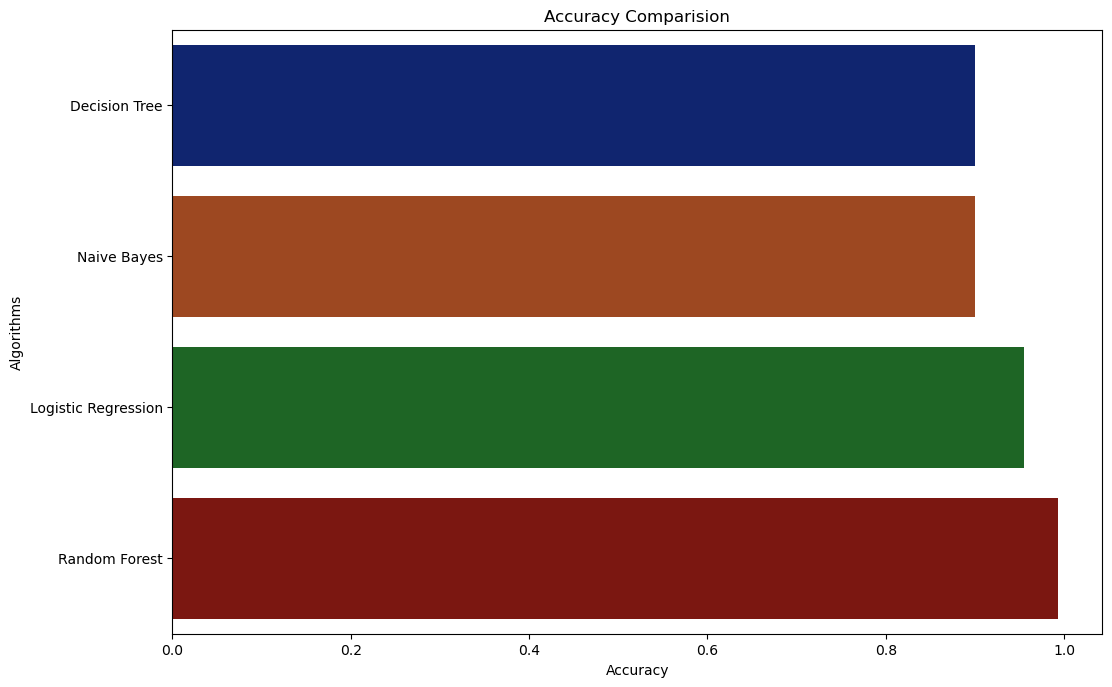

In [32]:
# Accuracy Comparison
plt.figure(figsize = [12,8],dpi = 100)
plt.title('Accuracy Comparision')
plt.xlabel('Accuracy')
plt.ylabel('Algorithms')
sns.barplot(x = acc,y = model,palette = 'dark')

In [33]:
# Accuracy models of all models 
accuracy_models = dict(zip(model,acc))
for k,v in accuracy_models.items():
  print(k,'-->',v* 100,'%')

Decision Tree --> 90.0 %
Naive Bayes --> 90.0 %
Logistic Regression --> 95.45454545454545 %
Random Forest --> 99.31818181818181 %


In [34]:
# Making a predictions
data = np.array([[90,42, 43, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['jute']


In [35]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [36]:
data = np.array([[17,18,43,24.48808,90.8,5.4,103.19]])
prediction = RF.predict(data)
print(prediction)

['pomegranate']
